# Densidad del tráfico en ciudades
Este dataset proporciona una vista detallada de los datos de tráfico en un entorno urbano futurista y contiene más de 1,2 millones de registros. Cada registro representa una instantánea única de varios factores que afectan las condiciones del tráfico en seis ciudades ficticias.

## Objetivo del dataset
El objetivo principal de este dataset es proporcionar una visión detallada y completa del tráfico urbano en un entorno futurista. Al combinar datos de diversas fuentes y factores, se busca entender y modelar la complejidad del tráfico en ciudades inteligentes.

In [1]:
# Cargar archivos
df_fct <- read.csv("./futuristic_city_traffic.csv")

In [2]:
# Mostrar la descripción del conjunto de datos
print(summary(df_fct))

           City                    Vehicle.Type   
 AquaCity    :203405   Autonomous Vehicle:757454  
 Ecoopolis   :204179   Car               : 78298  
 MetropolisX :202981   Drone             :304951  
 Neuroburg   :203184   Flying Car        : 78864  
 SolarisVille:202981                              
 TechHaven   :202837                              
                                                  
                  Weather       Economic.Condition    Day.Of.Week    
 Clear                :243650   Booming  :406684   Friday   :173672  
 Electromagnetic Storm:243857   Recession:406571   Monday   :173905  
 Rainy                :243628   Stable   :406312   Saturday :174097  
 Snowy                :244195                      Sunday   :173823  
 Solar Flare          :244237                      Thursday :174509  
                                                   Tuesday  :174783  
                                                   Wednesday:174778  
  Hour.Of.Day        Speed      

In [3]:
# Mostrar los primeros elementos del conjunto de datos
print(head(df_fct))

          City       Vehicle.Type     Weather Economic.Condition Day.Of.Week
1 SolarisVille              Drone       Snowy             Stable      Sunday
2     AquaCity         Flying Car Solar Flare          Recession   Wednesday
3    Neuroburg Autonomous Vehicle Solar Flare          Recession   Wednesday
4    Ecoopolis              Drone       Clear            Booming    Thursday
5     AquaCity Autonomous Vehicle Solar Flare             Stable    Saturday
6    TechHaven Autonomous Vehicle       Snowy          Recession    Thursday
  Hour.Of.Day    Speed Is.Peak.Hour Random.Event.Occurred Energy.Consumption
1          20  29.4268            0                     0            14.7134
2           2 118.8000            0                     0           143.5682
3          16 100.3904            0                     0            91.2640
4           8  76.8000            1                     0            46.0753
5          16  45.2176            0                     0            40.1934

In [4]:
# Mostrar la información del conjunto de datos
print(str(df_fct))

'data.frame':	1219567 obs. of  11 variables:
 $ City                 : Factor w/ 6 levels "AquaCity","Ecoopolis",..: 5 1 4 2 1 6 2 2 3 5 ...
 $ Vehicle.Type         : Factor w/ 4 levels "Autonomous Vehicle",..: 3 4 1 3 1 1 1 1 3 3 ...
 $ Weather              : Factor w/ 5 levels "Clear","Electromagnetic Storm",..: 4 5 5 1 5 4 3 4 4 4 ...
 $ Economic.Condition   : Factor w/ 3 levels "Booming","Recession",..: 3 2 2 1 3 2 2 3 2 1 ...
 $ Day.Of.Week          : Factor w/ 7 levels "Friday","Monday",..: 4 7 7 5 3 5 2 1 3 3 ...
 $ Hour.Of.Day          : int  20 2 16 8 16 20 21 20 7 15 ...
 $ Speed                : num  29.4 118.8 100.4 76.8 45.2 ...
 $ Is.Peak.Hour         : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Random.Event.Occurred: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Energy.Consumption   : num  14.7 143.6 91.3 46.1 40.2 ...
 $ Traffic.Density      : num  0.5241 0.3208 0.0415 0.1811 0.4544 ...
NULL


In [5]:
# Calcular elementos nulos en las columnas de un dataframe
calcular_nulos <- function(df) {
  nulos <- colSums(is.na(df))
  return(nulos)
}

nulos_df_fct <- calcular_nulos(df_fct)
print("Elementos nulos por columna:")
print(nulos_df_fct)

[1] "Elementos nulos por columna:"
                 City          Vehicle.Type               Weather 
                    0                     0                     0 
   Economic.Condition           Day.Of.Week           Hour.Of.Day 
                    0                     0                     0 
                Speed          Is.Peak.Hour Random.Event.Occurred 
                    0                     0                     0 
   Energy.Consumption       Traffic.Density 
                    0                     0 


In [6]:
# Calcular valores máximos y mínimos de las columnas de un dataframe
calcular_extremos <- function(df) {
  extremos <- list()
  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      extremos[[col]] <- c(Minimo = min(df[[col]], na.rm = TRUE),
                           Maximo = max(df[[col]], na.rm = TRUE))
    } else {
      extremos[[col]] <- "No es una columna numérica"
    }
  }
  return(extremos)
}

extremos_df_fct <- calcular_extremos(df_fct)
print("Valores máximos y mínimos por columna:")
print(extremos_df_fct)

[1] "Valores máximos y mínimos por columna:"
$City
[1] "No es una columna numérica"

$Vehicle.Type
[1] "No es una columna numérica"

$Weather
[1] "No es una columna numérica"

$Economic.Condition
[1] "No es una columna numérica"

$Day.Of.Week
[1] "No es una columna numérica"

$Hour.Of.Day
Minimo Maximo 
     0     23 

$Speed
  Minimo   Maximo 
  6.6934 163.0886 

$Is.Peak.Hour
Minimo Maximo 
     0      1 

$Random.Event.Occurred
Minimo Maximo 
     0      1 

$Energy.Consumption
  Minimo   Maximo 
  4.9296 189.9489 

$Traffic.Density
Minimo Maximo 
0.0059 3.3776 



In [7]:
# Calcular las desviaciones estándar de las columnas numéricas de un dataframe
calcular_desviaciones <- function(df) {
  desviaciones <- list()
  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      desviaciones[[col]] <- sd(df[[col]], na.rm = TRUE)
    } else {
      desviaciones[[col]] <- "No es una columna numérica"
    }
  }
  return(desviaciones)
}

desviaciones_df_fct <- calcular_desviaciones(df_fct)
print("Desviaciones estándar por columna numérica:")
print(desviaciones_df_fct)

[1] "Desviaciones estándar por columna numérica:"
$City
[1] "No es una columna numérica"

$Vehicle.Type
[1] "No es una columna numérica"

$Weather
[1] "No es una columna numérica"

$Economic.Condition
[1] "No es una columna numérica"

$Day.Of.Week
[1] "No es una columna numérica"

$Hour.Of.Day
[1] 6.919071

$Speed
[1] 26.63203

$Is.Peak.Hour
[1] 0.3616178

$Random.Event.Occurred
[1] 0.2177123

$Energy.Consumption
[1] 25.28014

$Traffic.Density
[1] 0.2191019



In [8]:
# Identificar valores atípicos por columna numérica
identificar_atipicos <- function(df) {
  numero_atipicos <- list()
  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      valores_unicos <- unique(df[[col]][!is.na(df[[col]])])
      es_booleana <- all(valores_unicos %in% c(0, 1))

      if (es_booleana) {
        n_atipicos <- sum(!is.na(df[[col]]) & !(df[[col]] %in% c(0, 1)))
        numero_atipicos[[col]] <- n_atipicos
      } else {
        Q1 <- quantile(df[[col]], 0.25, na.rm = TRUE)
        Q3 <- quantile(df[[col]], 0.75, na.rm = TRUE)
        IQR <- Q3 - Q1
        limite_inferior <- Q1 - 1.5 * IQR
        limite_superior <- Q3 + 1.5 * IQR
        n_atipicos <- sum(df[[col]] < limite_inferior | df[[col]] > limite_superior, na.rm = TRUE)
        numero_atipicos[[col]] <- n_atipicos
      }
    } else {
      numero_atipicos[[col]] <- "No es una columna numérica"
    }
  }
  return(numero_atipicos)
}

cantidad_atipicos_df_fct <- identificar_atipicos(df_fct)
cat("Número de valores atípicos por columna numérica (considerando booleanos):\n")
print(cantidad_atipicos_df_fct)

Número de valores atípicos por columna numérica (considerando booleanos):
$City
[1] "No es una columna numérica"

$Vehicle.Type
[1] "No es una columna numérica"

$Weather
[1] "No es una columna numérica"

$Economic.Condition
[1] "No es una columna numérica"

$Day.Of.Week
[1] "No es una columna numérica"

$Hour.Of.Day
[1] 0

$Speed
[1] 127

$Is.Peak.Hour
[1] 0

$Random.Event.Occurred
[1] 0

$Energy.Consumption
[1] 9050

$Traffic.Density
[1] 27466



## Gráficas

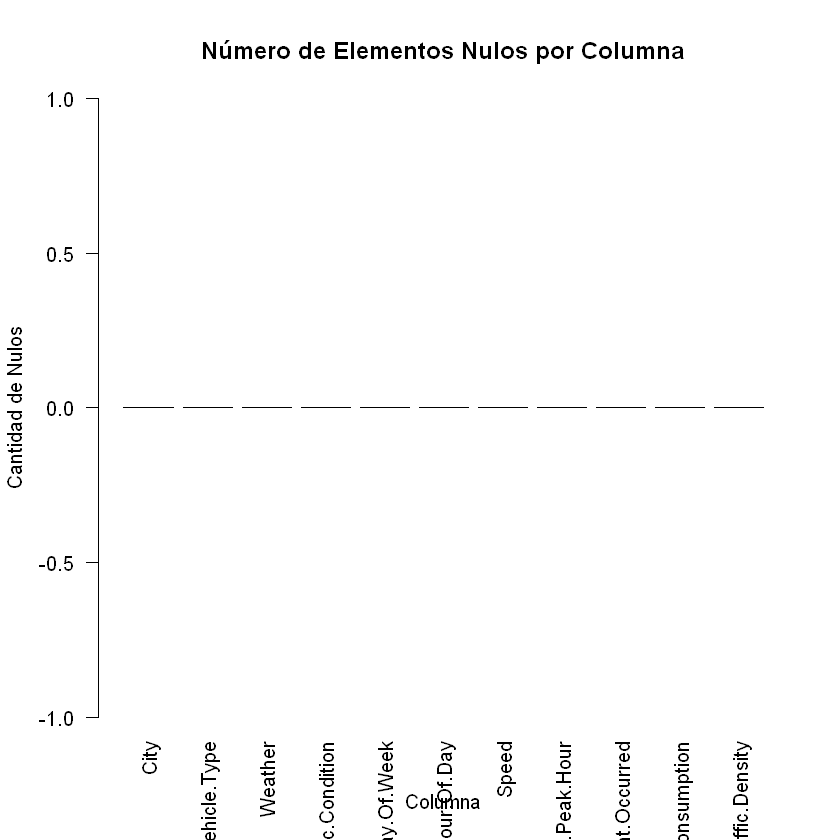

In [9]:
# Función para graficar el número de elementos nulos por columna (base R)
graficar_nulos_base <- function(nulos) {
  barplot(nulos, main = "Número de Elementos Nulos por Columna",
          xlab = "Columna", ylab = "Cantidad de Nulos",
          col = "steelblue", las = 2)
}
nulos_resultado <- calcular_nulos(df_fct)
graficar_nulos_base(nulos_resultado)

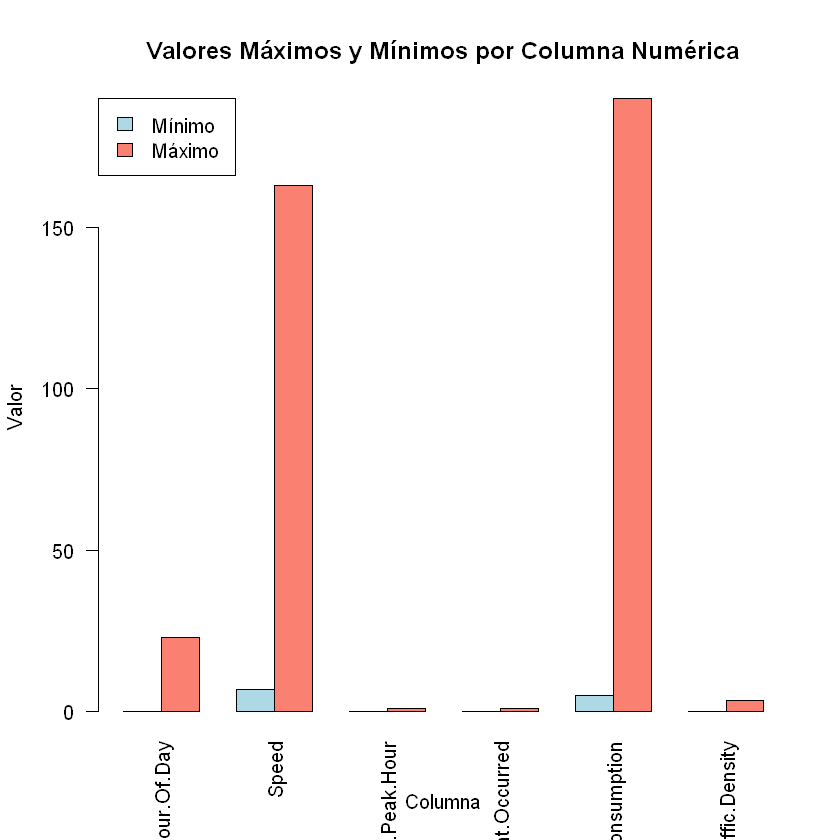

In [10]:
# Función para graficar los valores máximos y mínimos por columna numérica (base R)
graficar_extremos_base <- function(extremos) {
  n_cols <- length(extremos)
  col_names <- names(extremos)
  min_vals <- numeric(n_cols)
  max_vals <- numeric(n_cols)
  valid_cols <- logical(n_cols)

  for (i in 1:n_cols) {
    if (is.numeric(extremos[[i]])) {
      min_vals[i] <- extremos[[i]]["Minimo"]
      max_vals[i] <- extremos[[i]]["Maximo"]
      valid_cols[i] <- TRUE
    } else {
      valid_cols[i] <- FALSE
    }
  }

  valid_names <- col_names[valid_cols]
  min_vals_valid <- min_vals[valid_cols]
  max_vals_valid <- max_vals[valid_cols]

  if (length(valid_names) > 0) {
    bar_pos <- barplot(rbind(min_vals_valid, max_vals_valid), beside = TRUE,
                      main = "Valores Máximos y Mínimos por Columna Numérica",
                      names.arg = valid_names,
                      xlab = "Columna", ylab = "Valor",
                      col = c("lightblue", "salmon"), las = 2)
    legend("topleft", legend = c("Mínimo", "Máximo"), fill = c("lightblue", "salmon"))
  } else {
    print("No hay columnas numéricas para graficar extremos.")
  }
}
extremos_resultado <- calcular_extremos(df_fct)
graficar_extremos_base(extremos_resultado)

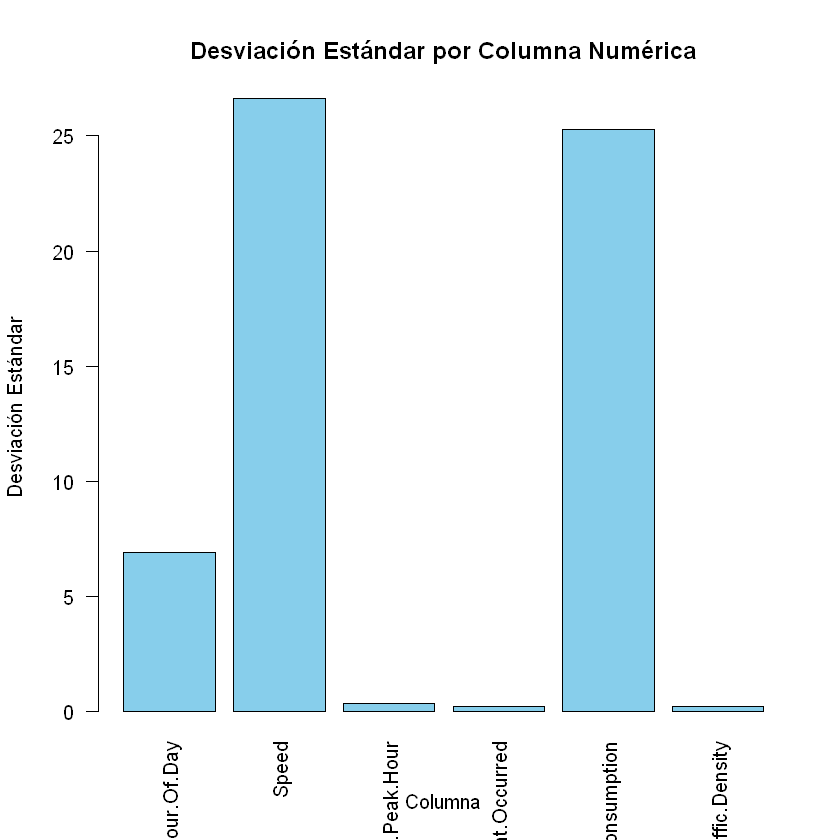

In [11]:
# Función para graficar las desviaciones estándar por columna numérica (base R)
graficar_desviaciones_base <- function(desviaciones) {
  valid_desv <- unlist(desviaciones[sapply(desviaciones, is.numeric)])
  valid_names <- names(desviaciones[sapply(desviaciones, is.numeric)])

  if (length(valid_desv) > 0) {
    barplot(valid_desv, names.arg = valid_names,
            main = "Desviación Estándar por Columna Numérica",
            xlab = "Columna", ylab = "Desviación Estándar",
            col = "skyblue", las = 2)
  } else {
    print("No hay columnas numéricas para graficar desviaciones estándar.")
  }
}
desviaciones_resultado <- calcular_desviaciones(df_fct)
graficar_desviaciones_base(desviaciones_resultado)

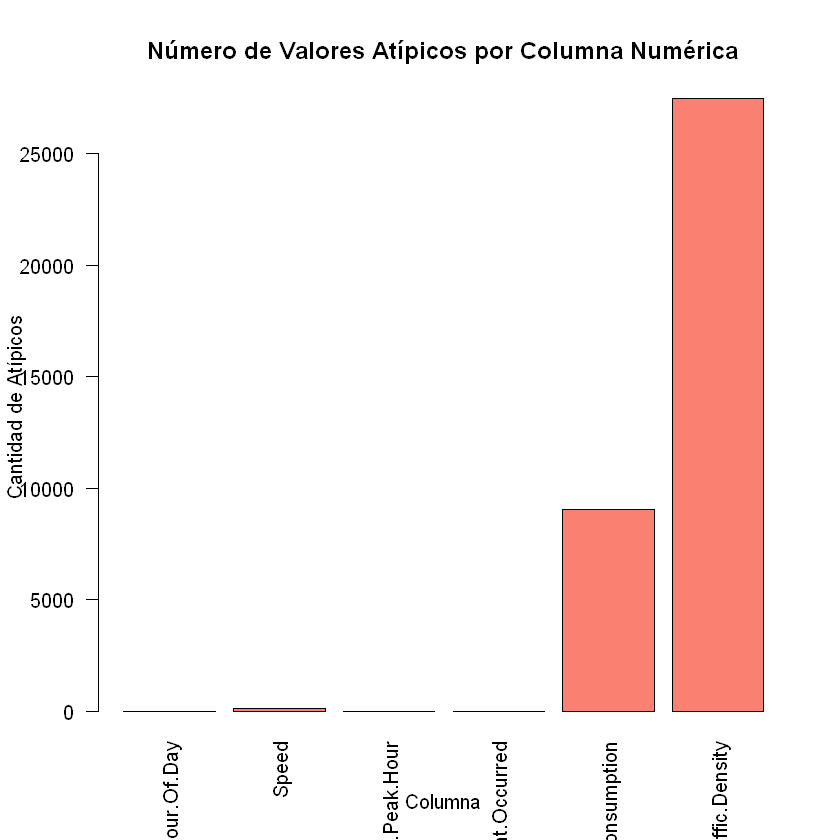

In [12]:
# Función para graficar el número de valores atípicos por columna numérica (base R)
graficar_atipicos_base <- function(numero_atipicos) {
  valid_atipicos <- unlist(numero_atipicos[sapply(numero_atipicos, is.numeric)])
  valid_names <- names(numero_atipicos[sapply(numero_atipicos, is.numeric)])

  if (length(valid_atipicos) > 0) {
    barplot(valid_atipicos, names.arg = valid_names,
            main = "Número de Valores Atípicos por Columna Numérica",
            xlab = "Columna", ylab = "Cantidad de Atípicos",
            col = "salmon", las = 2)
  } else {
    print("No hay columnas numéricas para graficar atípicos.")
  }
}
atipicos_resultado <- identificar_atipicos(df_fct)
graficar_atipicos_base(atipicos_resultado)

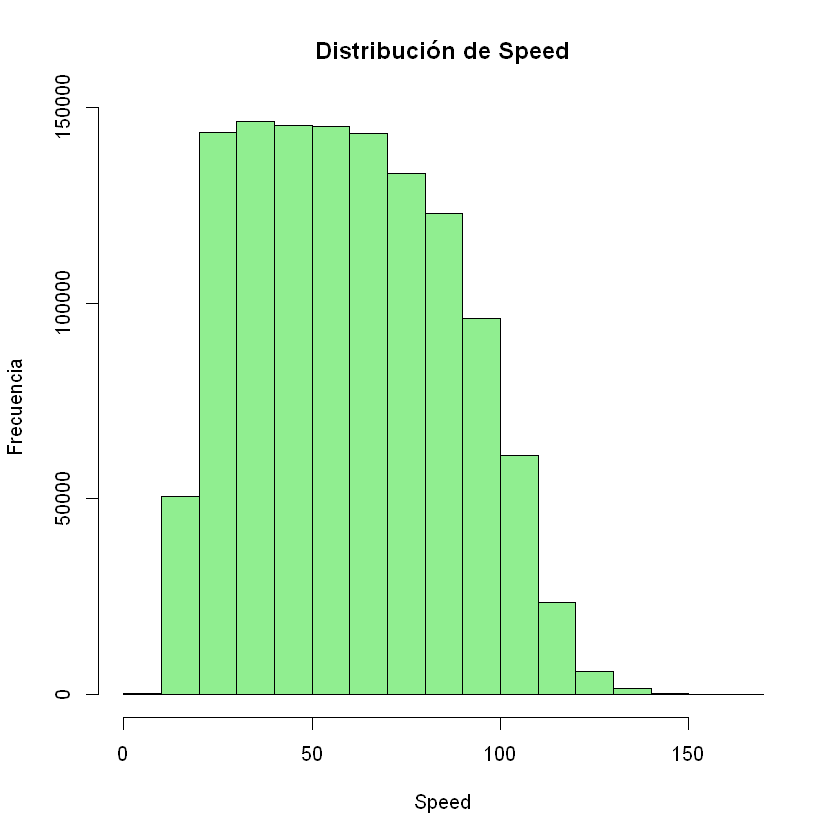

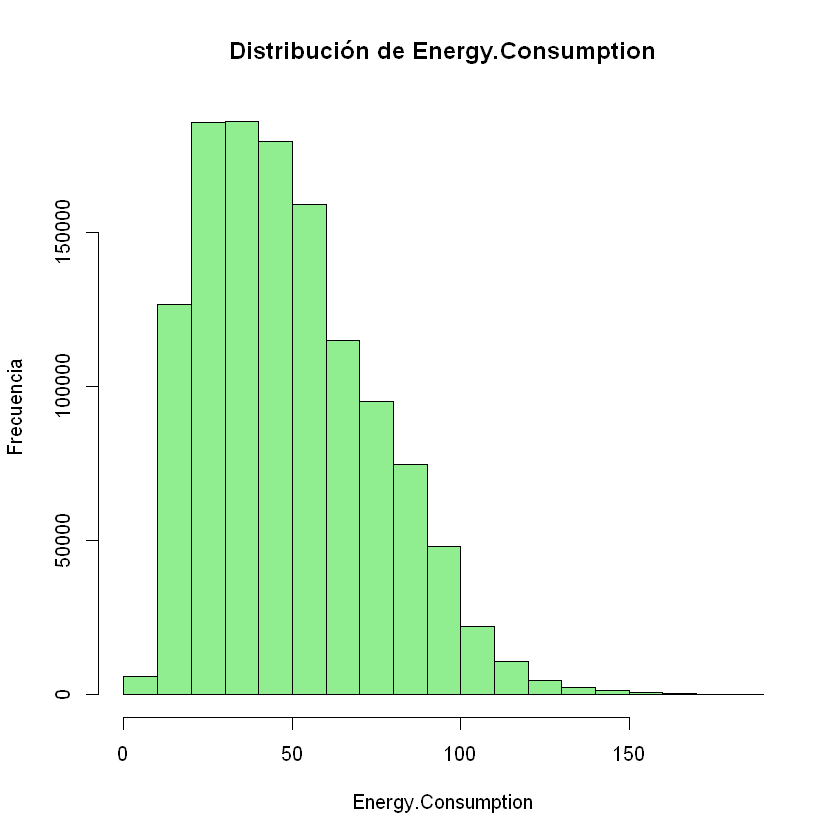

In [13]:
# Función para realizar cálculos estadísticos y graficarlos
graficar_distribucion_numerica_base <- function(df, columna) {
  if (!is.numeric(df[[columna]])) {
    print(paste("La columna", columna, "no es numérica."))
    return(NULL)
  }
  hist(df[[columna]], main = paste("Distribución de", columna),
       xlab = columna, ylab = "Frecuencia", col = "lightgreen", border = "black")
}
graficar_distribucion_numerica_base(df_fct, "Speed")
graficar_distribucion_numerica_base(df_fct, "Energy.Consumption")

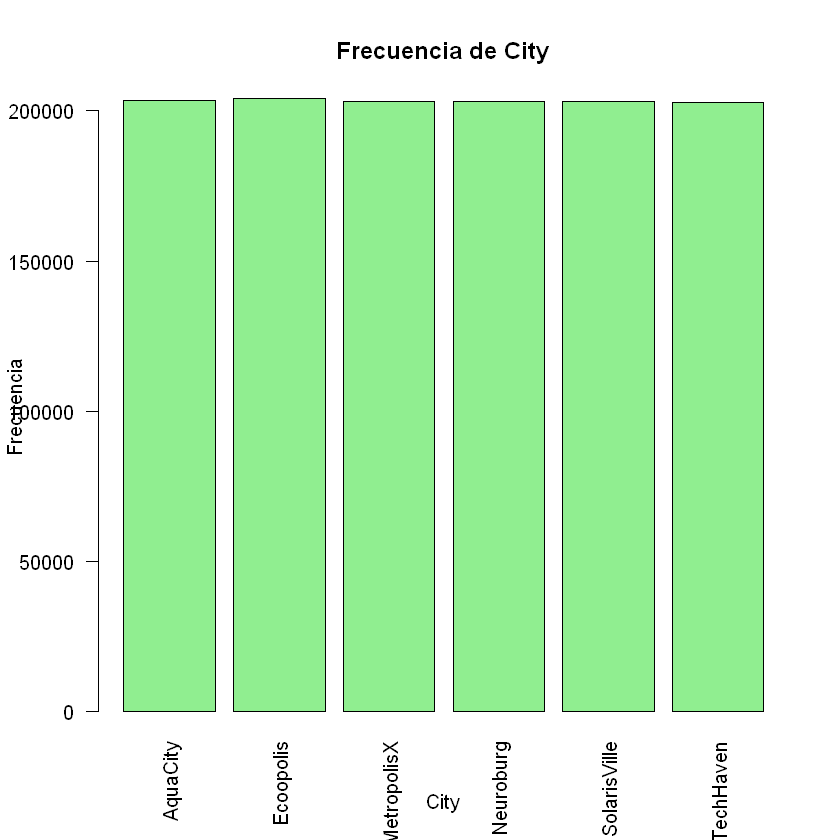

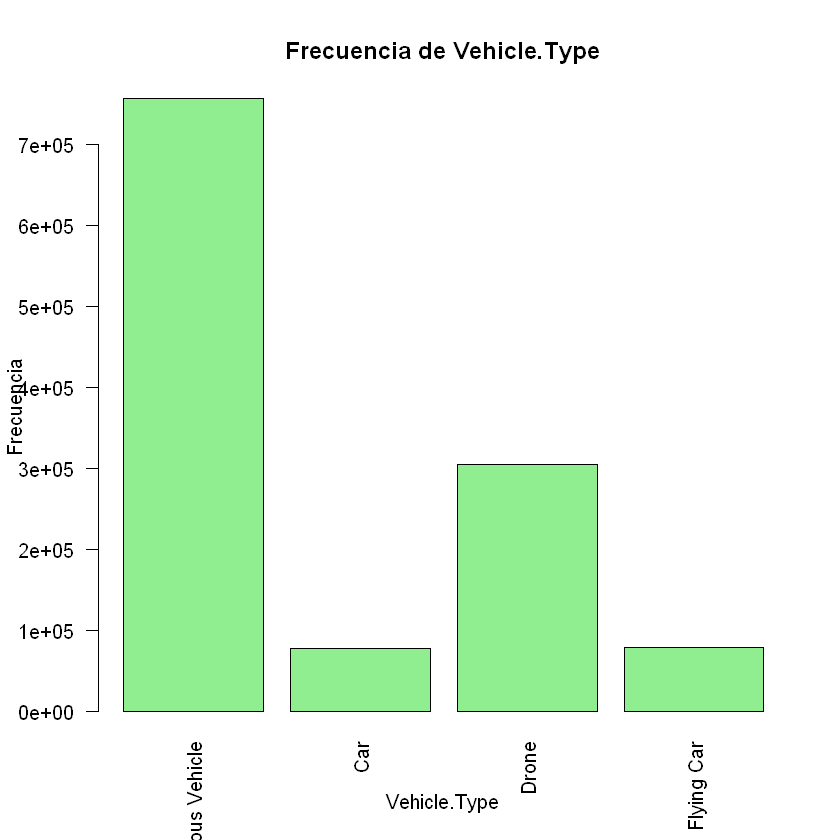

In [14]:
# Función adicional para calcular y graficar la frecuencia de datos categóricos
graficar_frecuencia_categorica_base <- function(df, columna) {
  if (!(is.factor(df[[columna]]) | is.character(df[[columna]]))) {
    print(paste("La columna", columna, "no es categórica."))
    return(NULL)
  }
  frecuencias <- table(df[[columna]])
  barplot(frecuencias, main = paste("Frecuencia de", columna),
          xlab = columna, ylab = "Frecuencia", col = "lightgreen", las = 2)
}
graficar_frecuencia_categorica_base(df_fct, "City")
graficar_frecuencia_categorica_base(df_fct, "Vehicle.Type")

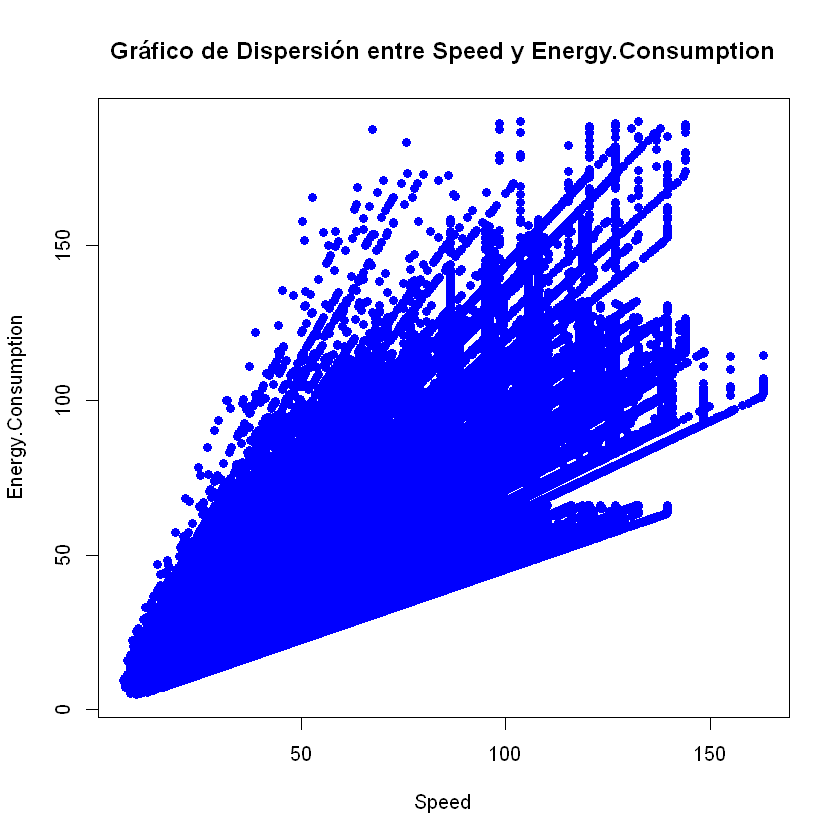

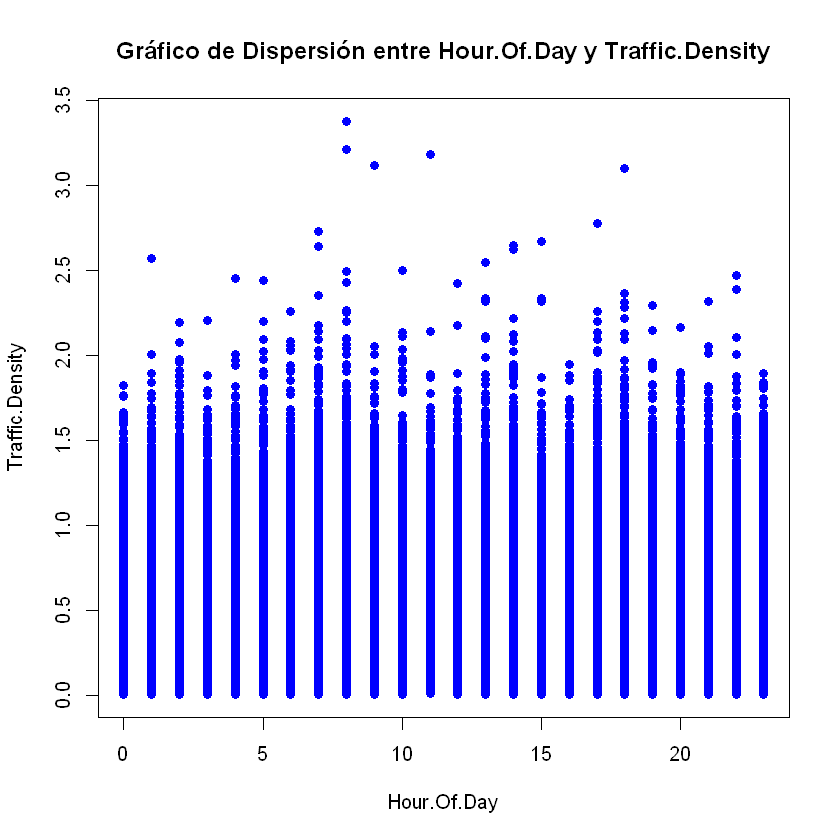

In [15]:
# Función para crear un gráfico de dispersión entre dos columnas numéricas
graficar_dispersion_base <- function(df, col1, col2) {
  if (!is.numeric(df[[col1]]) || !is.numeric(df[[col2]])) {
    print("Ambas columnas deben ser numéricas.")
    return(NULL)
  }

  plot(df[[col1]], df[[col2]],
       main = paste("Gráfico de Dispersión entre", col1, "y", col2),
       xlab = col1, ylab = col2,
       pch = 16,
       col = "blue")
}
graficar_dispersion_base(df_fct, "Speed", "Energy.Consumption")
graficar_dispersion_base(df_fct, "Hour.Of.Day", "Traffic.Density")

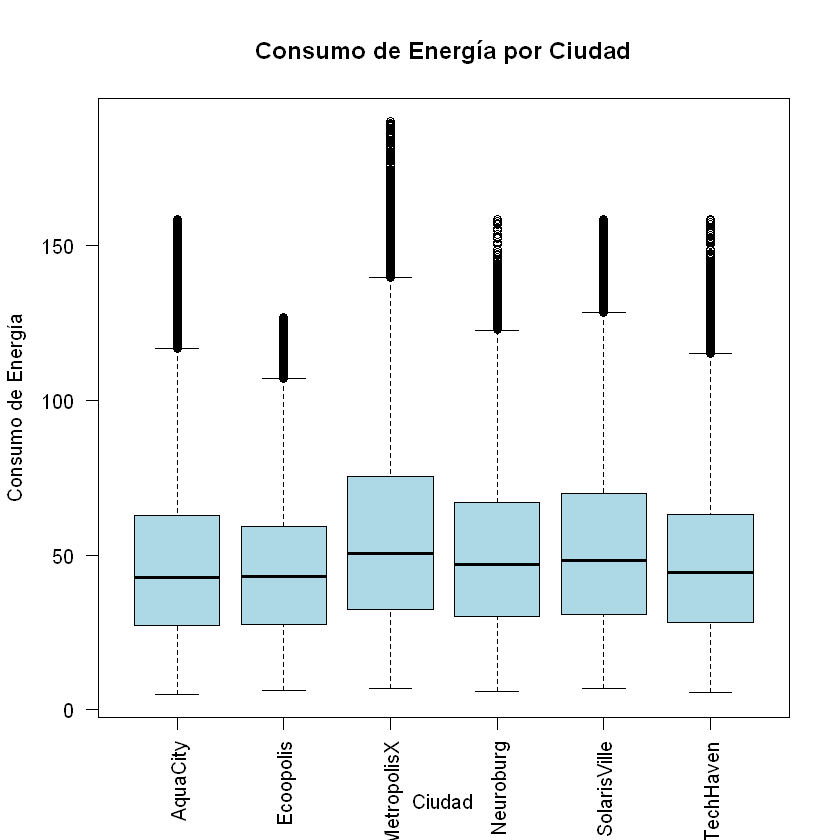

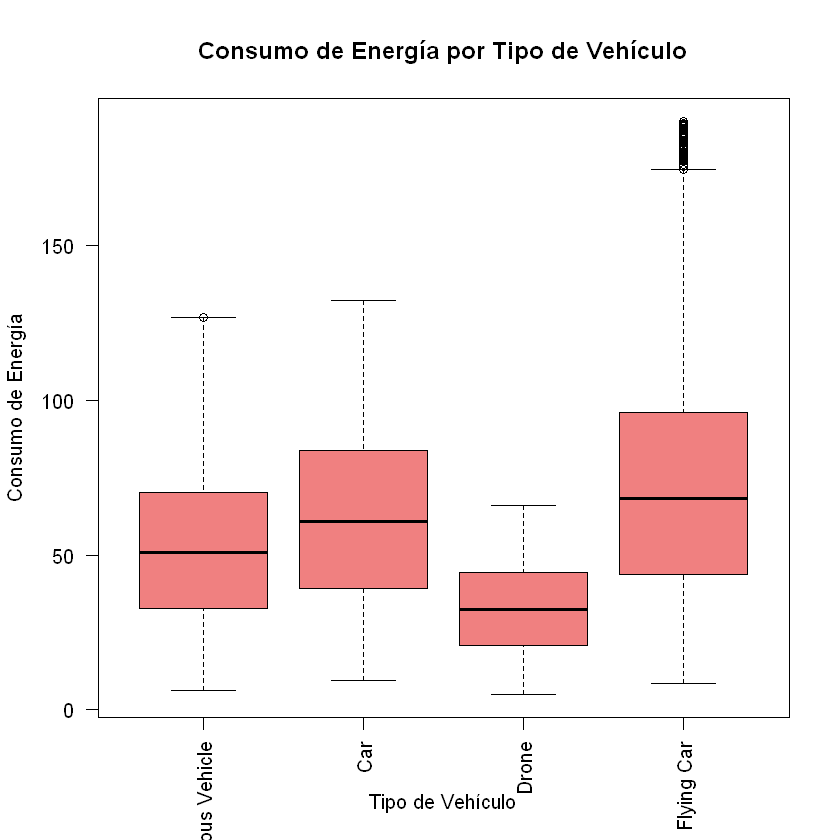

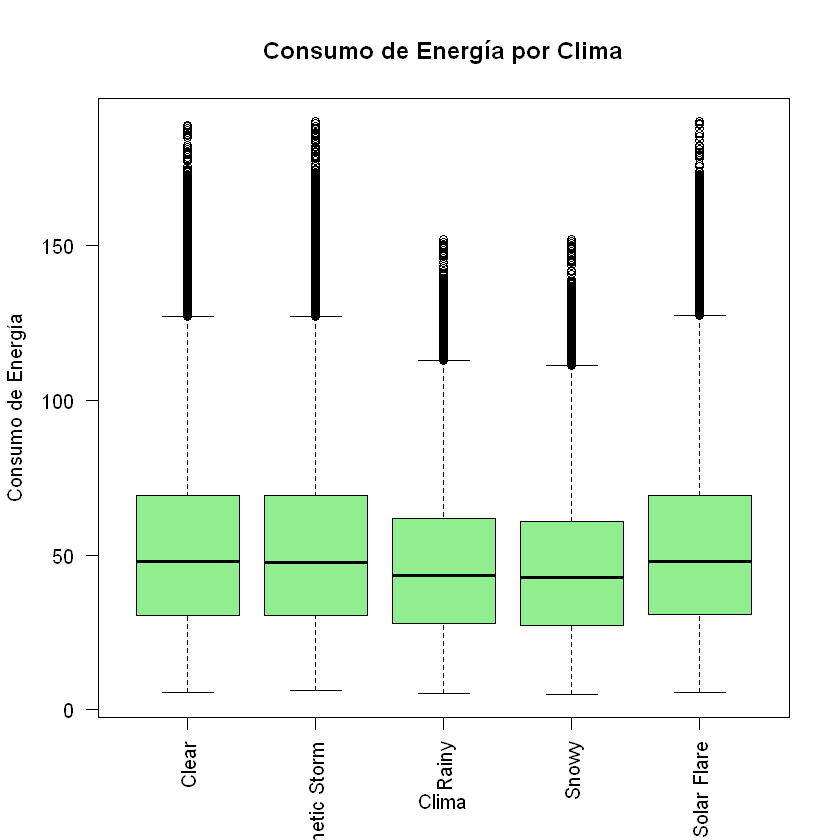

In [16]:
# Diagrama de cajas de Consumo de Energía por Ciudad
boxplot(df_fct$Energy.Consumption ~ df_fct$City,
        main = "Consumo de Energía por Ciudad",
        xlab = "Ciudad", ylab = "Consumo de Energía",
        col = "lightblue", las = 2)
# Diagrama de cajas de Consumo de Energía por Tipo de Vehículo
boxplot(df_fct$Energy.Consumption ~ df_fct$Vehicle.Type,
        main = "Consumo de Energía por Tipo de Vehículo",
        xlab = "Tipo de Vehículo", ylab = "Consumo de Energía",
        col = "lightcoral", las = 2)
# Diagrama de cajas de Consumo de Energía por Clima
boxplot(df_fct$Energy.Consumption ~ df_fct$Weather,
        main = "Consumo de Energía por Clima",
        xlab = "Clima", ylab = "Consumo de Energía",
        col = "lightgreen", las = 2)

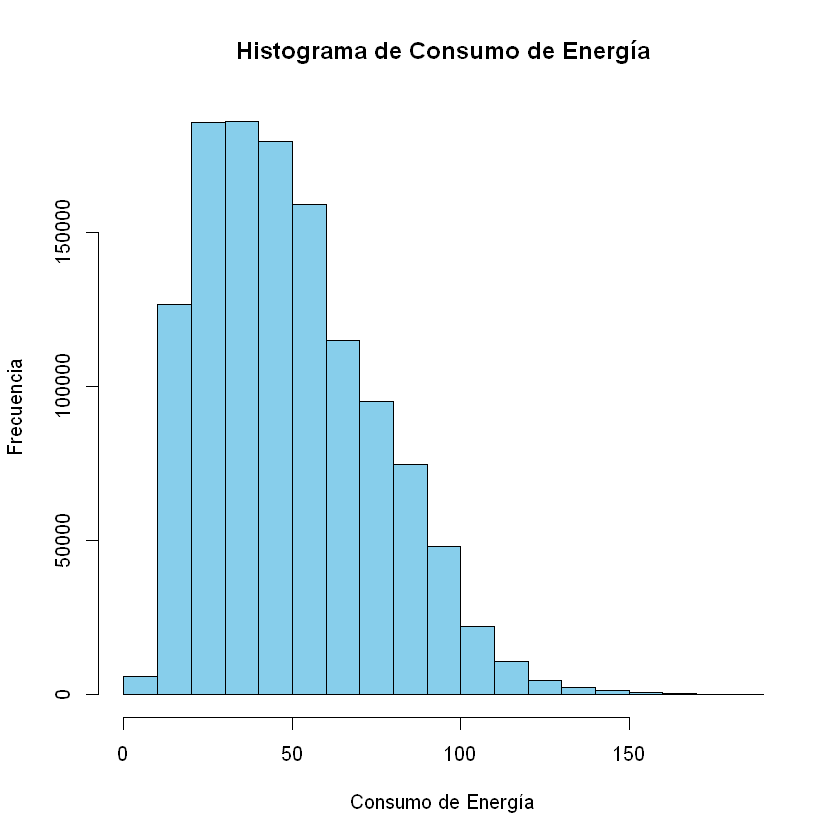

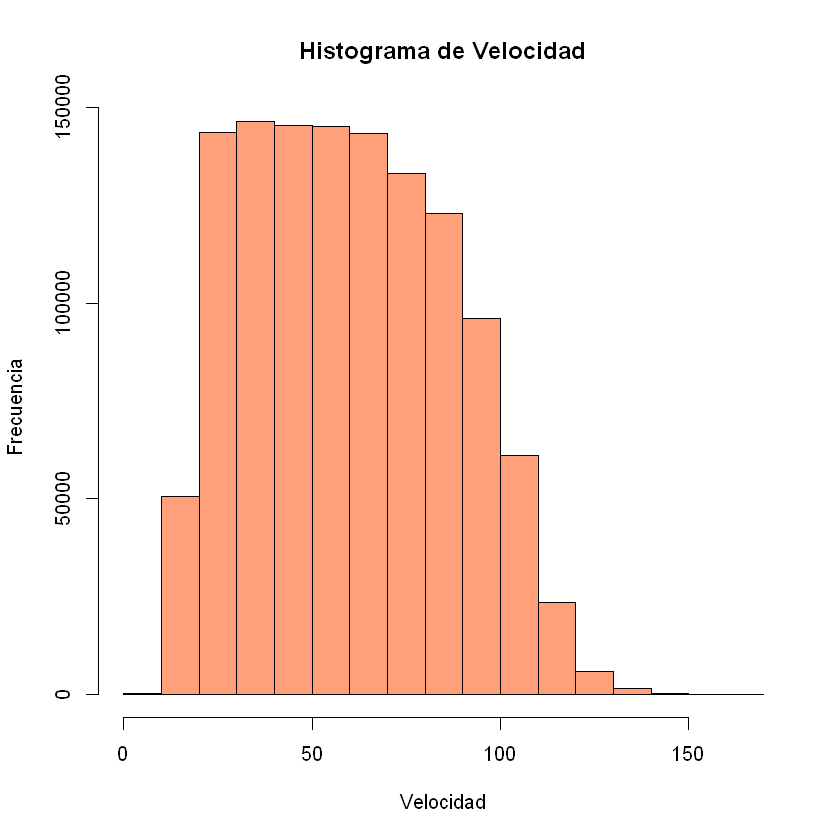

In [17]:
# Histograma de Consumo de Energía
hist(df_fct$Energy.Consumption,
     main = "Histograma de Consumo de Energía",
     xlab = "Consumo de Energía", ylab = "Frecuencia",
     col = "skyblue", border = "black")

# Histograma de Velocidad
hist(df_fct$Speed,
     main = "Histograma de Velocidad",
     xlab = "Velocidad", ylab = "Frecuencia",
     col = "lightsalmon", border = "black")

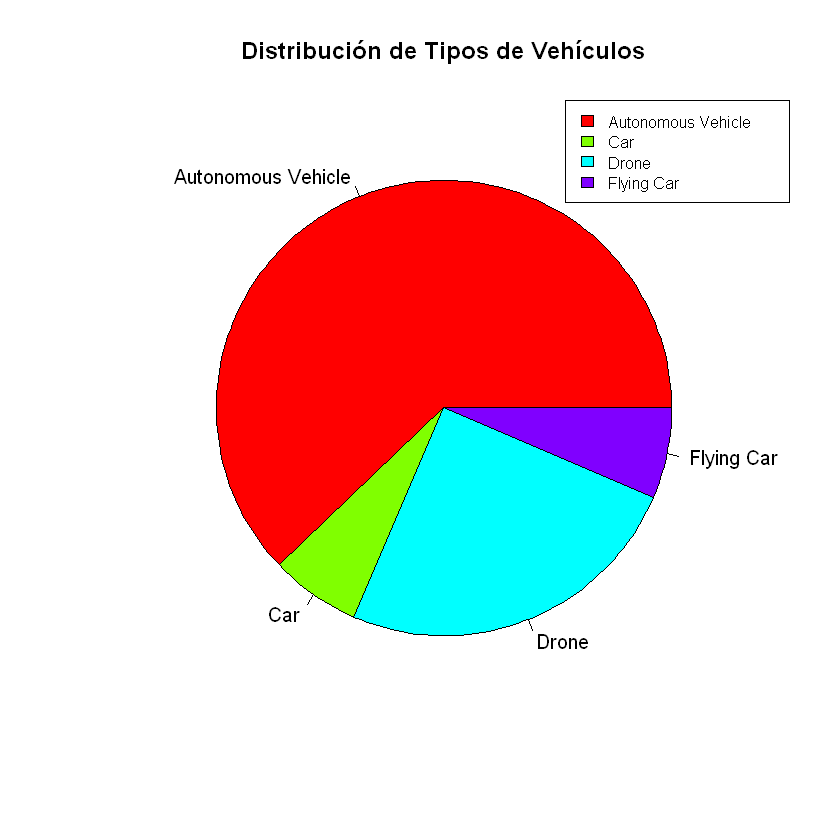

In [18]:
# Calcular la frecuencia de cada tipo de vehículo
frecuencia_vehiculos <- table(df_fct$Vehicle.Type)

# Crear el gráfico de pastel
pie(frecuencia_vehiculos,
    main = "Distribución de Tipos de Vehículos",
    col = rainbow(length(frecuencia_vehiculos)))
legend("topright", names(frecuencia_vehiculos),
       fill = rainbow(length(frecuencia_vehiculos)), cex = 0.8)